In [1]:
# dataframe opertations - pandas
import pandas as pd
import requests as req
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Documents\\data_crossbreed_rmgr.csv",index_col='Month', parse_dates=True)

<AxesSubplot:title={'center':'Cross Breed cocoon price'}, xlabel='Month'>

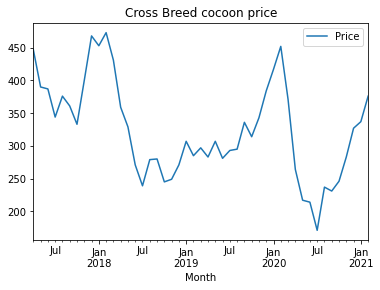

In [3]:
df.shape
df.head()
df[['Price']].plot(title='Cross Breed cocoon price')

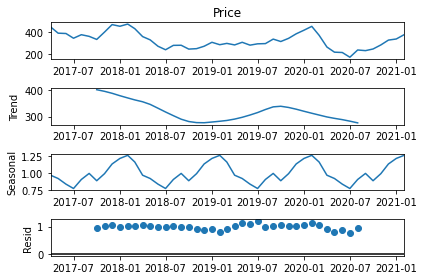

In [4]:
decompose_result = seasonal_decompose(df['Price'],model='multiplicative')
decompose_result.plot();

In [5]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


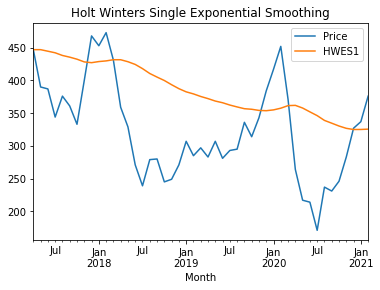

In [6]:
#Holt's winter single exponential smoothing:

df['HWES1'] = SimpleExpSmoothing(df['Price']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['Price','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


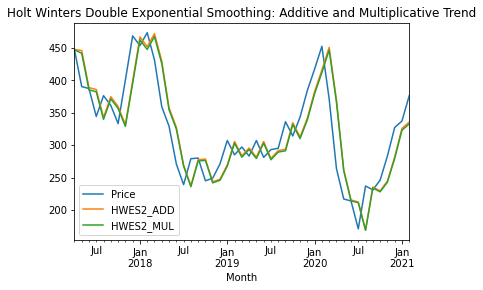

In [7]:
#Holt's winter double exponential smoothing:

df['HWES2_ADD'] = ExponentialSmoothing(df['Price'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Price'],trend='mul').fit().fittedvalues
df[['Price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


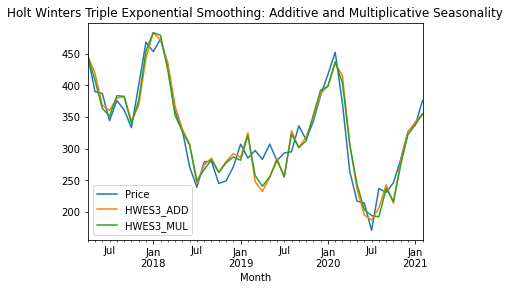

In [8]:
#Holts winter triple exponential smoothing:

df['HWES3_ADD'] = ExponentialSmoothing(df['Price'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

df['HWES3_MUL'] = ExponentialSmoothing(df['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

df[['Price','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

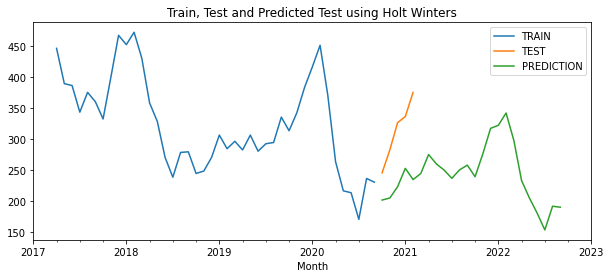

In [9]:
#Split data into train and test:

train_df = df[:42]
test_df = df[42:]


#Forecasting with holts winter exponential smoothing:

fitted_model = ExponentialSmoothing(train_df['Price'],trend='mul',seasonal='mul',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(24)
train_df['Price'].plot(legend=True,label='TRAIN')
test_df['Price'].plot(legend=True,label='TEST',figsize=(10,4))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2017/01/01','2023/01/01'])
plt.title('Train, Test and Predicted Test using Holt Winters')

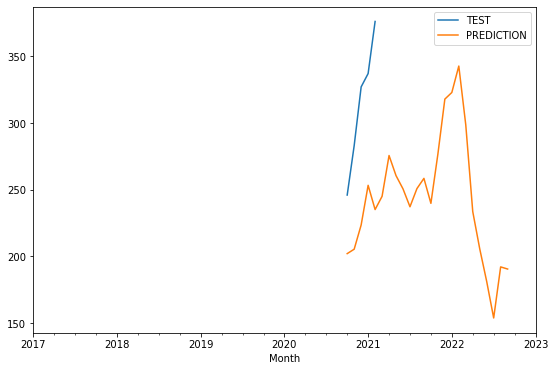

In [10]:
test_df['Price'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2017/01/01','2023/01/01']);

In [11]:
#Forecating score:

result = pd.concat([df, test_predictions])
result.to_csv("C:\\Users\\Admin\\Documents\\output_forecasting\\output_cross_breed.csv")
test_predictions

# result = pd.concat([df, test_predictions])
# result


2020-10-01    202.133422
2020-11-01    205.435146
2020-12-01    223.584239
2021-01-01    253.285409
2021-02-01    235.134838
2021-03-01    245.034645
2021-04-01    275.599400
2021-05-01    260.535925
2021-06-01    250.631955
2021-07-01    237.224735
2021-08-01    250.853636
2021-09-01    258.479336
2021-10-01    239.788595
2021-11-01    276.613039
2021-12-01    317.854399
2022-01-01    322.805720
2022-02-01    342.601754
2022-03-01    298.523585
2022-04-01    233.610198
2022-05-01    205.755814
2022-06-01    181.263218
2022-07-01    153.934882
2022-08-01    192.187510
2022-09-01    190.588557
Freq: MS, dtype: float64

In [ ]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error
# print(f'Mean Absolute Error = {mean_absolute_error(test_df,test_df)}')
# print(f'Mean Squared Error = {mean_squared_error(test_df,test_df)}')